<div class="alert alert-vlock alert-info"> A tutorial: A Comprehensive Guide to Customer Segmentation in Python with Kmeans </div>

<div class="alert alert-vlock alert-info"> Importing libraries, loading the dataset and checking the shape </div>

In [80]:
import pandas as pd
import numpy as np

In [81]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [82]:
print('Shape of the dataset:', df.shape)

Shape of the dataset: (200, 5)


<div class="alert alert-vlock alert-info"> Checking the data types of the columns </div>

In [83]:
print('\nData types of the columns:')
print(df.dtypes)


Data types of the columns:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


<div class="alert alert-vlock alert-info"> # Check for missing values </div>

In [84]:
print('\nMissing values in each column:')
print(df.isnull().sum())


Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<div class="alert alert-vlock alert-info"> Getting a summary of the numerical columns </div>

In [85]:
df.describe().astype(int)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


<div class="alert alert-vlock alert-info"> Importing libraries </div>

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
sns.set(style='whitegrid')

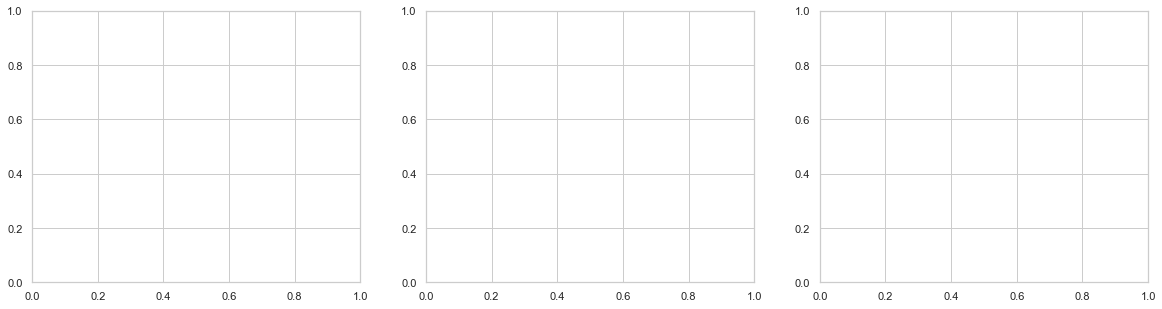

In [88]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

<div class="alert alert-vlock alert-info"> Plotting the distribution of age, annual income, and spending score </div>

In [89]:
sns.histplot(data=df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

<div class="alert alert-vlock alert-info"> Setting the titles of the plots </div>

In [90]:
axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

Text(0.5, 1.0, 'Spending Score Distribution')

<div class="alert alert-vlock alert-info"> Setting the title for the entire plot </div>

In [91]:
fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

Text(0.5, 0.98, 'Distribution Analysis of Age, Annual Income, and Spending Score')

<div class="alert alert-vlock alert-info"> Display the plots </div>

In [92]:
plt.show()

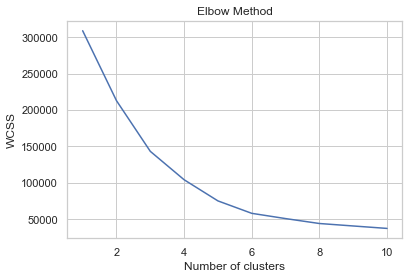

In [93]:
from sklearn.cluster import KMeans

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig("elbow.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Selecting five clusters </div>

In [94]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

labels = kmeans.fit_predict(features)

df['Cluster'] = labels

df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


<div class="alert alert-vlock alert-info"> Calculating the mean </div>

In [95]:
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,40,87,17
4,25,26,78


<div class="alert alert-vlock alert-info"> Creating a scatter plot on annual income and spending score </div>

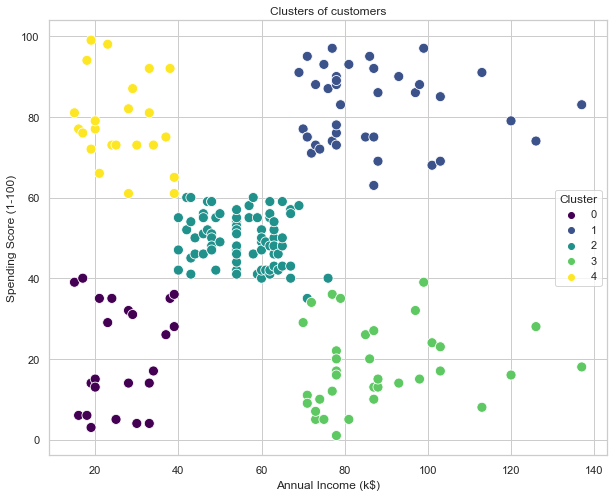

In [96]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

plt.title('Clusters of customers')

plt.savefig("clustersofcustomers.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Creating a scatter plot of age vs spending score </div>

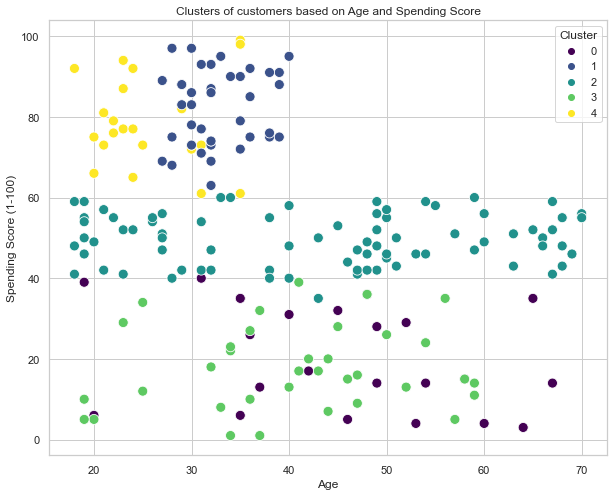

In [97]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', 
palette='viridis', s=100)

plt.title('Clusters of customers based on Age and Spending Score')

plt.savefig("clustersofcustomersbasedonageandspendingscore.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Creating a count plot to show the distribution of gender within each cluster </div>

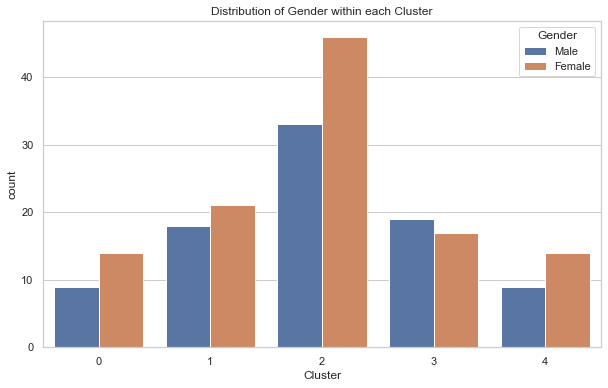

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')

plt.title('Distribution of Gender within each Cluster')

plt.savefig("DistributionofGender.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Creating a pairplot for relationships between the different features </div>

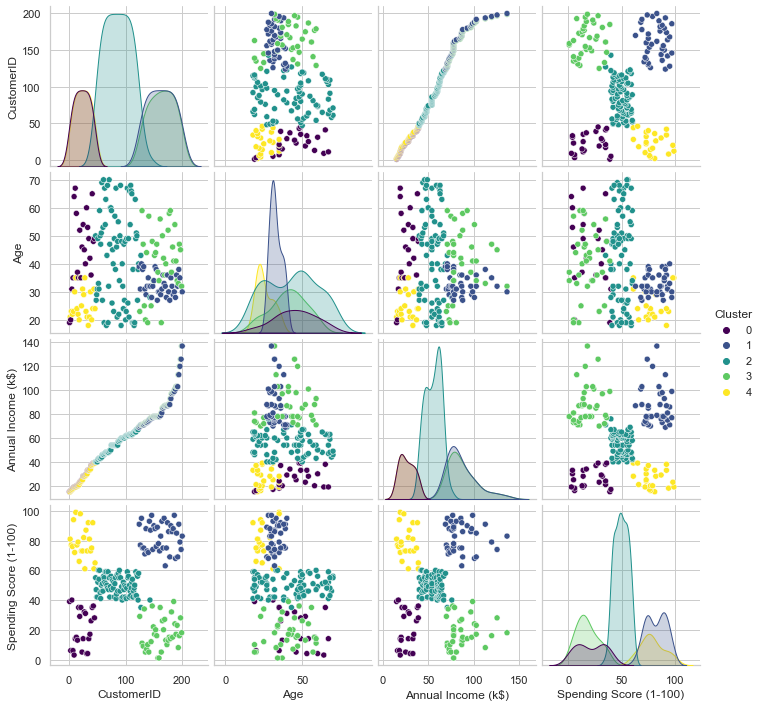

In [99]:
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.savefig("pairplot.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Creating  a boxplot for each feature split by Cluster </div>

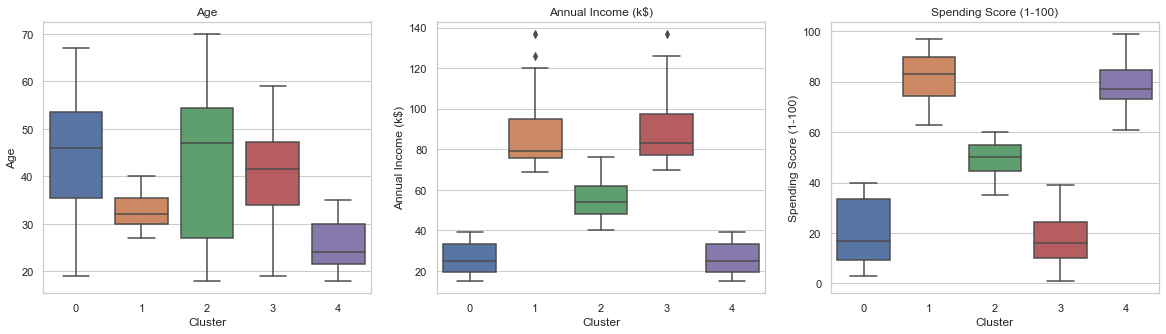

In [100]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')
plt.savefig("boxplot.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Improving the clustering scaling the features </div>

In [101]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Cluster'])

print('Silhouette Score: ', silhouette_score)

Silhouette Score:  0.44428597560893024


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(scaled_features)

df['Scaled_Cluster'] = kmeans.labels_

scaled_silhouette_score = silhouette_score(scaled_features, df['Scaled_Cluster'])

print('Scaled Silhouette Score:', scaled_silhouette_score)


Scaled Silhouette Score: 0.41664341513732767


In [103]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5)

agg_clustering.fit(scaled_features)

df['Agg_Cluster'] = agg_clustering.labels_

agg_silhouette_score = silhouette_score(scaled_features, df['Agg_Cluster'])

print('Agglomerative Clustering Silhouette Score: ', agg_silhouette_score)

Agglomerative Clustering Silhouette Score:  0.39002826186267214


In [104]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)

pca_features = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(pca_features)

df['PCA_Cluster'] = kmeans.labels_

pca_silhouette_score = silhouette_score(pca_features, df['PCA_Cluster'])

print('PCA Silhouette Score: ', pca_silhouette_score)

PCA Silhouette Score:  0.3898114280785039


In [105]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan.fit(pca_features)

df['DBSCAN_Cluster'] = dbscan.labels_

dbscan_silhouette_score = silhouette_score(pca_features, df['DBSCAN_Cluster'])

print('DBSCAN Silhouette Score: ', dbscan_silhouette_score)

DBSCAN Silhouette Score:  0.3203118288175694


<div class="alert alert-vlock alert-info"> Insights </div>

In [106]:
cluster_characteristics = df.groupby('Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean().astype(int)

cluster_characteristics

C:\Users\Marko\AppData\Local\Temp/ipykernel_17460/835899205.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_characteristics = df.groupby('Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean().astype(int)


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,40,87,17
4,25,26,78


Cluster 0: Conservative Middle-Aged: Middle-aged 45-year-olds, low annual income, low consumption result, conservative in their consumption, not sensitive to marketing.

Cluster 1: Young High Earners: Average age of 32, high annual income, high consumption result, hard to spend, could be the right target group for marketing.

Cluster 2: Balanced Middle-Aged: Average age of 43, middle income, consumption result average, marketing for this group should focus on quality and price, precise about their consumption.

Cluster 3: Wealthy Savers: Average age 40, high annual income, low consumption result, conservative to spend, need to find out why, perhaps quality/price conscious.

Cluster 4: Young Spenders: Young adults with an average age of 25, low annual income, high consumption result, even with low income, hard to spend.
